In [3]:
import zipfile
import pandas as pd

# Unzipping the uploaded file
zip_path = "/Users/hyunghoon/Desktop/머신러닝연습/electricCar/open.zip"
extracted_path = "/Users/hyunghoon/Desktop/머신러닝연습/electricCar/"

In [4]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Loading the CSV files
train_path = extracted_path + "train.csv"
test_path = extracted_path + "test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


In [130]:
train_df.columns = train_df.columns.str.replace(' ', '_')
test_df.columns = test_df.columns.str.replace(' ', '_')

In [131]:
# Displaying the first few rows of both datasets
train_info = train_df.info(), train_df.head()
test_info = test_df.info(), test_df.head()

train_info, test_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     4786 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        846 non-null    object 
 1   제조사       846 non-null    object 
 2   모델        846 non-null    object 
 3   차량상태      846 non

((None,
             ID 제조사      모델        차량상태   배터리용량 구동방식  주행거리(km)  보증기간(년) 사고이력  \
  0  TRAIN_0000  P사  TayGTS  Nearly New  86.077  AWD     13642        0   No   
  1  TRAIN_0001  K사    Niro  Nearly New  56.000  FWD     10199        6   No   
  2  TRAIN_0002  A사      eT   Brand New  91.200  AWD      2361        7   No   
  3  TRAIN_0003  A사  RSeTGT  Nearly New     NaN  AWD     21683        3   No   
  4  TRAIN_0004  B사      i5   Pre-Owned  61.018  AWD    178205        1   No   
  
     연식(년)  가격(백만원)  
  0      2   159.66  
  1      0    28.01  
  2      0    66.27  
  3      0    99.16  
  4      0    62.02  ),
 (None,
           ID 제조사     모델        차량상태   배터리용량 구동방식  주행거리(km)  보증기간(년) 사고이력  연식(년)
  0  TEST_000  P사  TayCT  Nearly New  76.093  AWD     14057        2   No      0
  1  TEST_001  B사     iX   Brand New  90.000  AWD      7547        8   No      0
  2  TEST_002  B사     i5   Brand New     NaN  RWD      7197        7  Yes      0
  3  TEST_003  H사   ION5  Nearly New  68.47

In [132]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [133]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

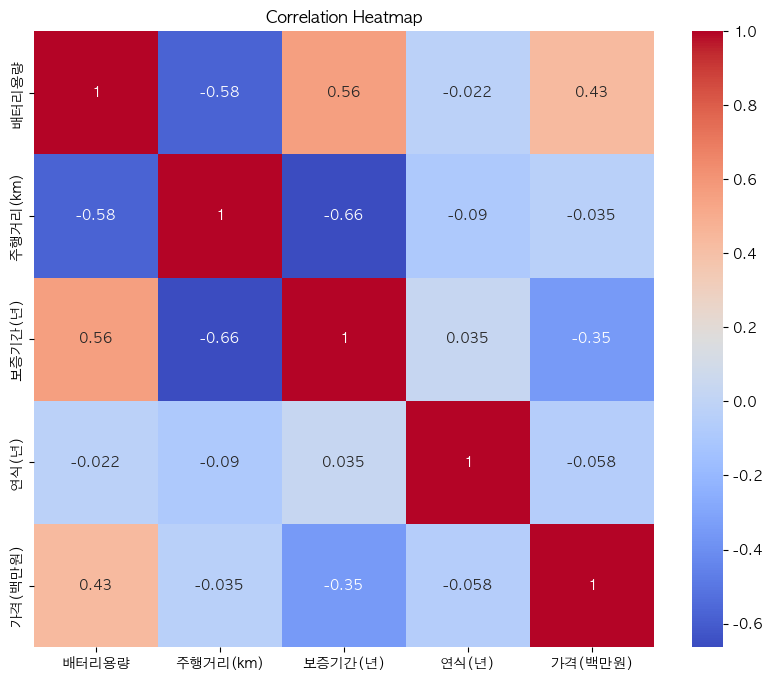

In [134]:
import numpy as np
import seaborn as sns

# 1. 데이터 분포 및 상관관계 분석
# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [135]:
# 2. 결측치 처리: 제조사와 모델 기준으로 배터리용량 중앙값 대체
# train_df['배터리용량'] = train_df.groupby(['제조사', '모델'])['배터리용량'].transform(lambda x: x.fillna(x.median()))
# test_df['배터리용량'] = test_df.groupby(['제조사', '모델'])['배터리용량'].transform(lambda x: x.fillna(x.median()))

# # 결측치 남은 경우 전체 중앙값으로 대체
# train_df['배터리용량'].fillna(train_df['배터리용량'].median(), inplace=True)
# test_df['배터리용량'].fillna(test_df['배터리용량'].median(), inplace=True)


train_df.fillna(-1, inplace=True)
test_df.fillna(-1, inplace=True)



#배터리 용량 결측치 처리
upper7 = train_df[train_df['보증기간(년)']>=7]['배터리용량'].mean()
lower7 = train_df[train_df['보증기간(년)']<7]['배터리용량'].mean()


def fill_battery(row):
    if row['배터리용량'] == -1:
        if row['보증기간(년)'] >= 7:
            return upper7
        else:
            return lower7
    return row['배터리용량']

train_df['배터리용량'] = train_df.apply(fill_battery, axis=1)
test_df['배터리용량'] = test_df.apply(fill_battery, axis=1)


#train_df.dropna(axis=0, inplace=True)
#test_df.dropna(axis=0, inplace=True)

In [136]:
train_df

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077000,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200000,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,52.848375,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018000,AWD,178205,1,No,0,62.02
...,...,...,...,...,...,...,...,...,...,...,...
7492,TRAIN_7492,H사,ION5,Brand New,31.999068,AWD,3773,10,No,0,35.95
7493,TRAIN_7493,B사,i3,Pre-Owned,46.000000,RWD,135411,2,No,0,23.40
7494,TRAIN_7494,P사,TayCT,Brand New,52.848375,AWD,1363,2,No,0,120.00
7495,TRAIN_7495,B사,i3,Nearly New,56.000000,RWD,39445,6,No,2,24.00


In [137]:
train_df.drop(['ID'], axis=1, inplace=True)
test_df.drop(['ID'], axis=1, inplace=True)

In [138]:
# 3. 범주형 데이터 인코딩 (제조사, 차량상태, 구동방식, 사고이력)
categorical_columns = ['제조사', '차량상태', '구동방식','모델'] #['제조사','', '차량상태', '구동방식', '사고이력']
train_encoded = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True)
test_encoded = pd.get_dummies(test_df, columns=categorical_columns, drop_first=True)


In [139]:
train_encoded['사고이력'] = train_encoded.사고이력.apply(lambda x : 0 if x == 'No' else 1)
test_encoded['사고이력'] = test_encoded.사고이력.apply(lambda x : 0 if x == 'No' else 1)

In [140]:
train_encoded['연식(년)'].value_counts()

연식(년)
0    6395
2     566
1     536
Name: count, dtype: int64

In [141]:
# 4. 이상치 탐지 및 제거 (주행거리 기준, IQR 적용)
Q1 = train_encoded['주행거리(km)'].quantile(0.25)
Q3 = train_encoded['주행거리(km)'].quantile(0.75)
IQR = Q3 - Q1

q1 = train_encoded['배터리용량'].quantile(0.25)
q3 = train_encoded['배터리용량'].quantile(0.75)
iqr = q3 - q1


In [142]:
# IQR 범위를 벗어나는 데이터 제거
train_encoded = train_encoded[(train_encoded['주행거리(km)'] >= (Q1 - 1.5 * IQR)) &
                              (train_encoded['주행거리(km)'] <= (Q3 + 1.5 * IQR))]

train_encoded = train_encoded[(train_encoded['배터리용량'] >= (q1 - 1.5 * iqr)) &
                              (train_encoded['배터리용량'] <= (q3 + 1.5 * iqr))]



In [143]:
# 5. 스케일링 (Min-Max 스케일링 적용)
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

scaler = StandardScaler()
train_encoded_scaled = train_encoded.copy()
test_encoded_scaled = test_encoded.copy()


In [144]:
train_encoded_scaled

,배터리용량,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원),제조사_B사,제조사_H사,제조사_K사,제조사_P사,...,모델_Q4eT,모델_RSeTGT,모델_Soul,모델_Tay,모델_TayCT,모델_TayGTS,모델_eT,모델_i3,모델_i5,모델_iX
0,86.077000,13642,0,0,2,159.66,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,56.000000,10199,6,0,0,28.01,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,91.200000,2361,7,0,0,66.27,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,52.848375,21683,3,0,0,99.16,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,58.162000,103100,3,0,0,37.02,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,31.999068,3773,10,0,0,35.95,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7493,46.000000,135411,2,0,0,23.40,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7494,52.848375,1363,2,0,0,120.00,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
7495,56.000000,39445,6,0,2,24.00,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [145]:
# # 1. 차량의 전반적인 상태를 나타내는 복합 지표 생성
# train_encoded_scaled['차량_상태_지수'] = (
#     train_encoded_scaled['배터리용량'] * 0.4 +
#     (-train_encoded_scaled['주행거리(km)']) * 0.4 +
#     train_encoded_scaled['보증기간(년)'] * 0.2
# )

# # 2. 배터리 효율성 지표
# train_encoded_scaled['배터리_효율'] = train_encoded_scaled['배터리용량'] / train_encoded_scaled['주행거리(km)']

# # 3. 제조사별 신뢰도 점수 (평균 가격 기반)
# manufacturer_reliability = train_df.groupby('제조사')['가격(백만원)'].mean()
# train_encoded_scaled['제조사_신뢰도'] = train_df['제조사'].map(manufacturer_reliability)

# # 4. 보증 가치 지수
# train_encoded_scaled['보증_가치'] = train_encoded_scaled['보증기간(년)'] * train_encoded_scaled['배터리용량']



# # 1. 차량의 전반적인 상태를 나타내는 복합 지표 생성
# test_encoded_scaled['차량_상태_지수'] = (
#     test_encoded_scaled['배터리용량'] * 0.4 +
#     (-test_encoded_scaled['주행거리(km)']) * 0.4 +
#     test_encoded_scaled['보증기간(년)'] * 0.2
# )

# # 2. 배터리 효율성 지표
# test_encoded_scaled['배터리_효율'] = test_encoded_scaled['배터리용량'] / test_encoded_scaled['주행거리(km)']

# # 3. 제조사별 신뢰도 점수 (train 데이터의 평균 가격 기준을 사용)
# # 주의: test 데이터에는 train 데이터에서 계산된 동일한 manufacturer_reliability를 사용합니다
# test_encoded_scaled['제조사_신뢰도'] = test_df['제조사'].map(manufacturer_reliability)

# # 4. 보증 가치 지수
# test_encoded_scaled['보증_가치'] = test_encoded_scaled['보증기간(년)'] * test_encoded_scaled['배터리용량']

In [146]:
display(train_encoded_scaled.head())
display(test_encoded_scaled.head())


,배터리용량,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원),제조사_B사,제조사_H사,제조사_K사,제조사_P사,...,모델_Q4eT,모델_RSeTGT,모델_Soul,모델_Tay,모델_TayCT,모델_TayGTS,모델_eT,모델_i3,모델_i5,모델_iX
0,86.077000,13642,0,0,2,159.66,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,56.000000,10199,6,0,0,28.01,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,91.200000,2361,7,0,0,66.27,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,52.848375,21683,3,0,0,99.16,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,58.162000,103100,3,0,0,37.02,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


,배터리용량,주행거리(km),보증기간(년),사고이력,연식(년),제조사_B사,제조사_H사,제조사_K사,제조사_P사,제조사_T사,...,모델_Q4eT,모델_RSeTGT,모델_Soul,모델_Tay,모델_TayCT,모델_TayGTS,모델_eT,모델_i3,모델_i5,모델_iX
0,76.093000,14057,2,0,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1,90.000000,7547,8,0,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,31.999068,7197,7,1,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,68.479000,10357,7,0,1,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,31.999068,7597,10,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [147]:
train_encoded_scaled.iloc[:, :2]

,배터리용량,주행거리(km)
0,86.077000,13642
1,56.000000,10199
2,91.200000,2361
3,52.848375,21683
5,58.162000,103100
...,...,...
7492,31.999068,3773
7493,46.000000,135411
7494,52.848375,1363
7495,56.000000,39445


In [148]:
train_encoded_scaled.iloc[:, -2:]

,모델_i5,모델_iX
0,False,False
1,False,False
2,False,False
3,False,False
5,False,False
...,...,...
7492,False,False
7493,False,False
7494,False,False
7495,False,False


In [149]:
# 스케일링 적용
#train_encoded_scaled.iloc[:, :3] = scaler.fit_transform(train_encoded_scaled.iloc[:, :3])


train_encoded_scaled.iloc[:, :2] = scaler.fit_transform(train_encoded.iloc[:, :2])
test_encoded_scaled.iloc[:, :2] = scaler.transform(test_encoded.iloc[:, :2])

# train_encoded_scaled.iloc[:, -4:] = scaler.fit_transform(train_encoded.iloc[:, -4:])
# test_encoded_scaled.iloc[:, -4:] = scaler.transform(test_encoded.iloc[:, -4:])

In [150]:
# 전처리 완료 데이터 확인
train_encoded_scaled

,배터리용량,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원),제조사_B사,제조사_H사,제조사_K사,제조사_P사,...,모델_Q4eT,모델_RSeTGT,모델_Soul,모델_Tay,모델_TayCT,모델_TayGTS,모델_eT,모델_i3,모델_i5,모델_iX
0,1.335993,-0.454378,0,0,2,159.66,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,-0.085624,-0.547466,6,0,0,28.01,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1.578137,-0.759382,7,0,0,66.27,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,-0.234589,-0.236974,3,0,0,99.16,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,0.016565,1.964292,3,0,0,37.02,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,-1.220051,-0.721206,10,0,0,35.95,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7493,-0.558284,2.837883,2,0,0,23.40,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7494,-0.234589,-0.786365,2,0,0,120.00,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
7495,-0.085624,0.243256,6,0,2,24.00,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [151]:
test_encoded_scaled

,배터리용량,주행거리(km),보증기간(년),사고이력,연식(년),제조사_B사,제조사_H사,제조사_K사,제조사_P사,제조사_T사,...,모델_Q4eT,모델_RSeTGT,모델_Soul,모델_Tay,모델_TayCT,모델_TayGTS,모델_eT,모델_i3,모델_i5,모델_iX
0,0.864090,-0.443158,2,0,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1,1.521417,-0.619168,8,0,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,-1.220051,-0.628631,7,1,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.504207,-0.543194,7,0,1,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-1.220051,-0.617816,10,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0.324786,2.348162,2,0,0,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
842,-0.107036,1.131771,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
843,-0.107036,2.543883,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
844,0.559367,-0.400656,4,0,0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [152]:
y = train_encoded_scaled['가격(백만원)']
train_encoded_scaled.drop(['가격(백만원)'], axis=1, inplace=True)

<Axes: xlabel='가격(백만원)', ylabel='Count'>

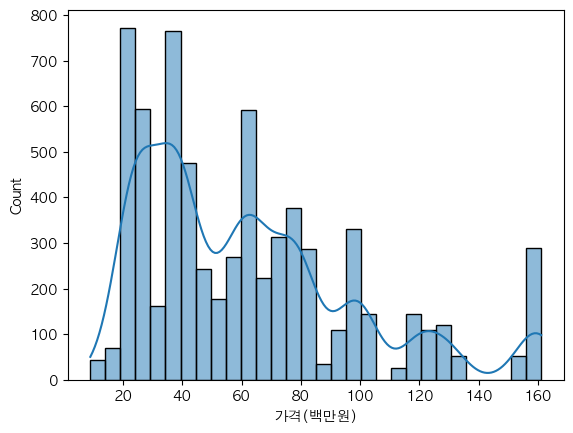

In [153]:
sns.histplot(y, bins=30, kde=True)  # 히스토그램 + KDE


<Axes: xlabel='가격(백만원)', ylabel='Count'>

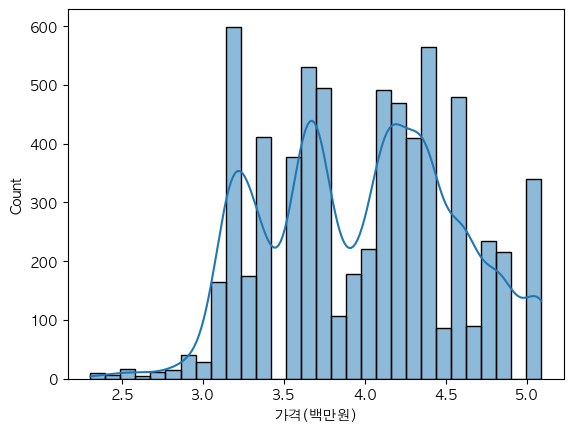

In [154]:
y1 = np.log1p(y)
sns.histplot(y1, bins=30, kde=True)

In [155]:
# from scipy.stats import boxcox

# # Box-Cox 변환 (양수만 적용 가능)
# y1, lambda_val = boxcox(y + 1)  # +1은 0이나 음수를 방지하기 위함
# print(f"최적의 λ 값: {lambda_val:.4f}")

In [156]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor



In [157]:
#!pip install dask[dataframe]

In [158]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_encoded_scaled, y1, test_size=0.1, random_state = 0)

In [159]:
rf = RandomForestRegressor()
lgbm = LGBMRegressor()
xgb = XGBRegressor()
cat = CatBoostRegressor(iterations=1000, depth=5, learning_rate=0.01)
etr = ExtraTreesRegressor()



In [160]:
rf.fit(x_train, y_train)
lgbm.fit(x_train, y_train)
xgb.fit(x_train, y_train)
cat.fit(x_train, y_train)
etr.fit(x_train, y_train)


# rf.fit(train_encoded_scaled, y1)
# lgbm.fit(train_encoded_scaled, y1)
# xgb.fit(train_encoded_scaled, y1)
# cat.fit(train_encoded_scaled, y1)
# etr.fit(train_encoded_scaled, y1)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 6093, number of used features: 35
[LightGBM] [Info] Start training from score 3.992120
0:	learn: 0.5720204	total: 671us	remaining: 671ms
1:	learn: 0.5674257	total: 1.33ms	remaining: 665ms
2:	learn: 0.5630128	total: 1.88ms	remaining: 624ms
3:	learn: 0.5587740	total: 2.45ms	remaining: 611ms
4:	learn: 0.5544871	total: 2.98ms	remaining: 594ms
5:	learn: 0.5502524	total: 3.53ms	remaining: 585ms
6:	learn: 0.5460925	total: 4.04ms	remaining: 573ms
7:	learn: 0.5419371	total: 4.59ms	remaining: 569ms
8:	learn: 0.5381603	total: 5.19ms	remaining: 572ms
9:	learn: 0.5339434	total: 5.88ms	remaining: 583ms
10:	lea

ExtraTreesRegressor()

In [161]:
print('Random forest 결정계수 : ',rf.score(x_valid,y_valid))
print('LGBM 결정계수 : ',lgbm.score(x_valid,y_valid))
print('Xgboost 결정계수 : ',xgb.score(x_valid,y_valid))
print('cat 결정계수 : ',cat.score(x_valid,y_valid))
print('etr 결정계수 : ',etr.score(x_valid,y_valid))


Random forest 결정계수 :  0.9931926727285955
LGBM 결정계수 :  0.9947339131207837
Xgboost 결정계수 :  0.9935406445686144
cat 결정계수 :  0.9910620016537653
etr 결정계수 :  0.9910725120717175


In [162]:
# RMSE
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
  return mean_squared_error(y_true, y_pred) ** 0.5

In [163]:
rf_pred = rf.predict(x_valid)
lgbm_pred = lgbm.predict(x_valid)
xgb_pred = xgb.predict(x_valid)
cat_pred = cat.predict(x_valid)
etr_pred = etr.predict(x_valid)


In [164]:
rf_pred1 = np.expm1(rf_pred)
lgbm_pred1 = np.expm1(lgbm_pred)
xgb_pred1 = np.expm1(xgb_pred)
cat_pred1 = np.expm1(cat_pred)
etr_pred1 = np.expm1(etr_pred)


# rf_pred1 = (rf_pred * lambda_val + 1)**(1/lambda_val) - 1
# lgbm_pred1 = (lgbm_pred * lambda_val + 1)**(1/lambda_val) - 1
# xgb_pred1 = (xgb_pred * lambda_val + 1)**(1/lambda_val) - 1
# cat_pred1 = (cat_pred * lambda_val + 1)**(1/lambda_val) - 1
# etr_pred1 = (etr_pred * lambda_val + 1)**(1/lambda_val) - 1


In [165]:
y_valid1 = np.expm1(y_valid)
#y_valid1 = (y_valid * lambda_val + 1)**(1/lambda_val) - 1

# RMSE
# print('선형회귀모형 RMSE : ',rmse(y_valid,lr_pred))
# print('Lasso RMSE : ',rmse(y_valid,lasso_pred))
# print('Ridge RMSE : ', rmse(y_valid,ridge_pred))
# print('의사결정나무 RMSE : ',rmse(y_valid,dt_pred))
# print('Random forest RMSE : ',rmse(y_valid,rf_pred))
# print('Gradient boosting RMSE : ',rmse(y_valid,gb_pred))
# print('LGBM RMSE : ',rmse(y_valid,lgbm_pred))
# print('XGB RMSE : ',rmse(y_valid,xgb_pred))

In [166]:
# RMSE
print('Random forest RMSE : ',rmse(y_valid1,rf_pred1))
print('LGBM RMSE : ',rmse(y_valid1,lgbm_pred1))
print('XGB RMSE : ',rmse(y_valid1,xgb_pred1))
print('CatBoost RMSE : ',rmse(y_valid1,cat_pred1))
print('etr RMSE : ',rmse(y_valid1,etr_pred1))


Random forest RMSE :  1.4144549736009615
LGBM RMSE :  1.2637589394298343
XGB RMSE :  1.3051591265480866
CatBoost RMSE :  2.3719802270326436
etr RMSE :  1.6511011346579925


In [127]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, x_valid, y_valid1, scoring='neg_root_mean_squared_error', cv=5)
print("평균 RMSE:", -scores.mean())


평균 RMSE: 1.9167925145707385


In [1411]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import GridSearchCV

# # XGBoost 모델 정의
# xgb = XGBRegressor()

# # 그리드서치를 위한 파라미터 설정
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1],
#     'min_child_weight': [1, 3, 5],
#     'subsample': [0.8, 0.9, 1.0]
    
# }

# # 그리드서치 객체 생성
# grid_search = GridSearchCV(
#     estimator=xgb,
#     param_grid=param_grid,
#     cv=5,
#     scoring='neg_mean_squared_error',
#     n_jobs=-1,
#     verbose=2
# )

# # 그리드서치 수행
# grid_search.fit(x_train, y_train)

# # 최적의 파라미터 출력
# print("Best parameters:", grid_search.best_params_)



In [1413]:
# from sklearn.model_selection import GridSearchCV
# from lightgbm import LGBMRegressor


# # LGBM 모델 초기화
# lgbm = LGBMRegressor()

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'num_leaves': [5, 10],  # 리프의 수
#     'learning_rate': [0.01, 0.05, 0.1],  # 학습률
#     'n_estimators': [100, 200, 500],  # 트리의 수
#     'max_depth': [3, 5],  # 트리의 최대 깊이
#     'min_child_samples': [10, 20]  # 자식 노드를 만들기 위한 최소 샘플 수
# }

# # GridSearchCV 설정
# grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# # 모델 학습 (그리드 서치 수행)
# grid_search.fit(x_train, y_train)

# # 최적 하이퍼파라미터 출력
# print("Best parameters found: ", grid_search.best_params_)

# # 최적 모델을 사용하여 예측
# best_lgbm = grid_search.best_estimator_
# lgbm_pred = np.expm1(best_lgbm.predict(x_valid))

# # RMSE 계산
# print("LGBM Best Model RMSE:", rmse(y_valid1, lgbm_pred))


# 추론

In [1691]:
test_encoded_scaled

,배터리용량,주행거리(km),보증기간(년),연식(년),제조사_B사,제조사_H사,제조사_K사,제조사_P사,제조사_T사,제조사_V사,...,모델_eT,모델_i3,모델_i5,모델_iX,차량상태_Nearly New,차량상태_Pre-Owned,구동방식_FWD,구동방식_RWD,사고이력_Yes,배터리_주행거리_상호작용
0,0.112595,-0.443158,-1.085034,0,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,-0.219783
1,1.106866,-0.619168,0.867941,0,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,-0.219783
2,0.769589,-0.628631,0.542445,0,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,4.549937
3,-0.431763,-0.543194,0.542445,1,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,-0.219783
4,0.769589,-0.617816,1.518932,0,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,-0.219783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,-0.703155,2.348162,-1.085034,0,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,-0.219783
842,-1.356327,1.131771,-1.736026,0,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,-0.219783
843,-1.356327,2.543883,-1.736026,0,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,-0.219783
844,-0.348329,-0.400656,-0.434042,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,-0.219783


In [ ]:
from xgboost import XGBRegressor
#from catboost import CatBoostRegressor, Pool

# 가정: x_train과 y_train이 이미 정의되어 있음

# XGBoost 모델 학습
xgboost_model = XGBRegressor(n_estimators=1000)
xgboost_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [2418]:
rf = RandomForestRegressor(oob_score=True, bootstrap=True)
rf.fit(train_encoded_scaled,y1)

RandomForestRegressor(oob_score=True)

In [994]:
# 최적의 모델로 예측
best_model = grid_search.best_estimator_
sub = best_model.predict(test_encoded_scaled)
sub[:5]

array([4.8749924, 4.3937387, 4.1734657, 3.581734 , 3.8647082],
      dtype=float32)

In [2546]:
sub = etr.predict(test_encoded_scaled)
sub[:5]

array([4.879856  , 4.39842777, 4.18385642, 3.56281397, 3.89161907])

In [2547]:
final = np.expm1(sub)
#final = (sub * lambda_val + 1)**(1/lambda_val) - 1

final[:5]

array([130.61171057,  80.32291003,  64.6184178 ,  34.26228474,
        47.9901408 ])

In [2548]:
sample = pd.read_csv('/Users/hyunghoon/Desktop/머신러닝연습/electricCar/sample_submission.csv')
sample

,ID,가격(백만원)
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0
4,TEST_004,0
...,...,...
841,TEST_841,0
842,TEST_842,0
843,TEST_843,0
844,TEST_844,0


In [2550]:
sample['가격(백만원)'] = final
sample

,ID,가격(백만원)
0,TEST_000,130.611711
1,TEST_001,80.322910
2,TEST_002,64.618418
3,TEST_003,34.262285
4,TEST_004,47.990141
...,...,...
841,TEST_841,151.326222
842,TEST_842,38.133438
843,TEST_843,38.486269
844,TEST_844,58.862432


In [2551]:
sample.to_csv('etr.csv', index=False)

In [1452]:
train_encoded_scaled

,배터리용량,주행거리(km),보증기간(년),연식(년),제조사_B사,제조사_H사,제조사_K사,제조사_P사,제조사_T사,제조사_V사,...,모델_TayGTS,모델_eT,모델_i3,모델_i5,모델_iX,차량상태_Nearly New,차량상태_Pre-Owned,구동방식_FWD,구동방식_RWD,사고이력_Yes
0,0.826394,-0.454378,-1.736026,2,False,False,False,True,False,False,...,True,False,False,False,False,True,False,False,False,-0.219783
1,-1.323940,-0.547466,0.216949,0,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,-0.219783
2,1.192659,-0.759382,0.542445,0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,-0.219783
3,-0.756805,-0.236974,-0.759538,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,-0.219783
5,-1.169369,1.964292,-0.759538,0,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,-0.219783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,0.769589,-0.721206,1.518932,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-0.219783
7493,-2.038882,2.837883,-1.085034,0,True,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,-0.219783
7494,-0.756805,-0.786365,-1.085034,0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,-0.219783
7495,-1.323940,0.243256,0.216949,2,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,-0.219783


In [168]:
from sklearn.ensemble import VotingRegressor


# 모델들을 튜플 형태로 리스트에 담기
single_models = [
  ('randomForest', rf),
    ('LGBM', lgbm),
   ('XGB', xgb),
  # ('ETR', etr),
  # ('CAT', cat)
  

    
   
]

# VotingRegressor 생성
voting_regressor = VotingRegressor(estimators=single_models)



# 모델 학습
voting_regressor.fit(train_encoded_scaled, y1)
#voting_regressor.fit(x_train, y_train)


# 예측
predictions = np.expm1(voting_regressor.predict(x_valid))
# predictions = voting_regressor.predict(x_valid)
# predictions = (predictions * lambda_val + 1)**(1/lambda_val) - 1
print('voting : ',rmse(y_valid1, predictions))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 436
[LightGBM] [Info] Number of data points in the train set: 6771, number of used features: 35
[LightGBM] [Info] Start training from score 3.988241
voting :  0.812644729736093


In [169]:
sub = voting_regressor.predict(test_encoded_scaled)
sub[:5]

array([4.87792001, 4.39606924, 4.18622655, 3.57478259, 3.88826277])

In [170]:
final = np.expm1(sub)
final[:5]

array([130.35715748,  80.13133289,  64.7741267 ,  34.68686124,
        47.82599075])

In [171]:
sample = pd.read_csv('/Users/hyunghoon/Desktop/머신러닝연습/electricCar/sample_submission.csv')
sample

,ID,가격(백만원)
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0
4,TEST_004,0
...,...,...
841,TEST_841,0
842,TEST_842,0
843,TEST_843,0
844,TEST_844,0


In [172]:
sample['가격(백만원)'] = final
sample

,ID,가격(백만원)
0,TEST_000,130.357157
1,TEST_001,80.131333
2,TEST_002,64.774127
3,TEST_003,34.686861
4,TEST_004,47.825991
...,...,...
841,TEST_841,151.717293
842,TEST_842,38.656878
843,TEST_843,38.653081
844,TEST_844,58.899225


In [173]:
sample.to_csv('voting_allData10.csv', index=False)